In [47]:
pwd

'F:\\PY'

##首先导入整理数据和数据可视化的包

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [49]:
df=pd.read_csv('F:\HR_comma_sep.csv')

%matplotlib inline 可以在Ipython编译器里直接使用，功能是可以内嵌绘图，并且可以省略掉plt.show()这一步。
导入数据到python中

In [50]:
##检查是否有缺失值
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [51]:
##适当改名，方便选取列
df = df.rename(columns={'promotion_last_5years': 'promotion',
                        'sales' : 'department'
                        })

In [52]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [53]:
##分别查看department列和salary列唯一值有多少个
df1=pd.Series(df['department']).unique()
df2=pd.Series(df['salary']).unique()

In [54]:
df1

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [55]:
df2

array(['low', 'medium', 'high'], dtype=object)

In [56]:
df.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [57]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [58]:
w=list(pd.Series(df['department']).unique())

w

w=list(df2)

w

df['salary'].replace(list(pd.Series(df['salary']).unique()),[0,1,2],inplace=True)

w=list(pd.Series(df['department']).unique())

w

['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']

In [59]:
##把两列的值转化为数值

df['department'].replace(list(pd.Series(df['department']).unique()),np.arange(10),inplace=True)
df['salary'].replace(list(pd.Series(df['salary']).unique()),[0,1,2],inplace=True)

In [60]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [61]:
front=df['left']## front=df.left
df.drop(labels='left',axis=1,inplace=True)#,axis=1，就是指列，有的情况下指行
df.insert(0,'left',front)#插入的位置，第一列，插入的列名，插入的内容
df.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,0,0
1,1,0.80,0.86,5,262,6,0,0,0,1
2,1,0.11,0.88,7,272,4,0,0,0,1
3,1,0.72,0.87,5,223,5,0,0,0,0
4,1,0.37,0.52,2,159,3,0,0,0,0


pandas.DataFrame.drop
labels : single label or list-like
Index or column labels to drop.
axis : {0 or ‘index’, 1 or ‘columns’}, default 0
Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).

drop_duplicates(inplace=True)是直接对原dataFrame进行操作。
如:
t.drop_duplicates(inplace=True) 则，对t中重复将被去除。
drop_duplicates(inplace=False)将不改变原来的dataFrame，而将结果生成在一个新的dataFrame中。
如：
s = t.drop_duplicates(inplace=False) 则，t的内容不发生改变，s的内容是去除重复后的内容m

In [62]:
##查看数据形状和结构
df.dtypes

left                      int64
satisfaction_level      float64
last_evaluation         float64
number_project            int64
average_montly_hours      int64
time_spend_company        int64
Work_accident             int64
promotion                 int64
department                int64
salary                    int64
dtype: object

In [63]:
df.shape

(14999, 10)

In [64]:
##看一下整体数据，大概有76%的人留下了，24%的人离开了
left_rate=df.left.value_counts()/14999
left_rate

0    0.761917
1    0.238083
Name: left, dtype: float64

In [65]:
##对left列进行聚合运算，描述性分析
left_summary=df.groupby('left')
left_summary.mean()
format=lambda x: '%.2f'%x
df.describe().applymap(format)

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion,department,salary
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.24,0.61,0.72,3.80,201.05,3.50,0.14,0.02,3.34,0.59
std,0.43,0.25,0.17,1.23,49.94,1.46,0.35,0.14,2.82,0.64
min,0.00,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00,0.00
25%,0.00,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00,0.00
50%,0.00,0.64,0.72,4.00,200.00,3.00,0.00,0.00,3.00,1.00
75%,0.00,0.82,0.87,5.00,245.00,4.00,0.00,0.00,6.00,1.00
max,1.00,1.00,1.00,7.00,310.00,10.00,1.00,1.00,9.00,2.00


In [66]:
format=lambda x: '%.2f'%x
left_summary=df.groupby('left')
left_summary.mean()
left_summary.describe().applymap(format)

Work_accident                                            \
             count  mean   std   min   25%   50%   75%   max   
left                                                           
0         11428.00  0.18  0.38  0.00  0.00  0.00  0.00  1.00   
1          3571.00  0.05  0.21  0.00  0.00  0.00  0.00  1.00   

     average_montly_hours          ...   satisfaction_level        \
                    count    mean  ...                  75%   max   
left                               ...                              
0                11428.00  199.06  ...                 0.84  1.00   
1                 3571.00  207.42  ...                 0.73  0.92   

     time_spend_company                                             
                  count  mean   std   min   25%   50%   75%    max  
left                                                                
0              11428.00  3.38  1.56  2.00  2.00  3.00  4.00  10.00  
1               3571.00  3.88  0.98  2.00  3.00  4.00  5.00   6.00  

[2 rows x 72 columns]

1 g = lambda x:x+1
　　看一下执行的结果：　
   g(1)
   >>>2

　　g(2)

　　>>>3

　　当然，你也可以这样使用：

　　lambda x:x+1(1)

　　>>>2　　　

　　可以这样认为,lambda作为一个表达式，定义了一个匿名函数，上例的代码x为入口参数，x+1为函数体，用函数来表示为：

1 def g(x):
2     return x+1

In [67]:
data = np.random.rand(10, 12)
data

array([[0.13285789, 0.85565087, 0.69342081, 0.31564564, 0.07887972,
        0.30927017, 0.27205526, 0.16265039, 0.71529825, 0.91624753,
        0.99173872, 0.33230514],
       [0.49919261, 0.06081232, 0.20939262, 0.53462682, 0.82143151,
        0.02507214, 0.16274452, 0.93297132, 0.62255775, 0.67592213,
        0.73681091, 0.79962619],
       [0.82320002, 0.3771278 , 0.015143  , 0.09430329, 0.54984842,
        0.41258606, 0.39564739, 0.69621381, 0.45795151, 0.62232424,
        0.50861492, 0.64165723],
       [0.49063722, 0.85454898, 0.63819895, 0.12483495, 0.92762468,
        0.66621633, 0.79822474, 0.41581792, 0.47262013, 0.13751046,
        0.56136544, 0.224925  ],
       [0.79644459, 0.29804163, 0.896907  , 0.91729103, 0.99005218,
        0.63453577, 0.06700712, 0.83587841, 0.14969884, 0.38412045,
        0.03694163, 0.82220734],
       [0.51089908, 0.96852754, 0.30035133, 0.25731636, 0.63481308,
        0.30477237, 0.66683957, 0.46980852, 0.10632311, 0.08583466,
        0.08682249,

In [68]:
np.random.randint(5, 10, 100)

array([6, 9, 5, 5, 6, 9, 9, 5, 6, 6, 6, 6, 9, 8, 7, 6, 9, 6, 6, 7, 5, 9,
       6, 8, 7, 7, 8, 5, 7, 6, 9, 7, 6, 6, 6, 8, 7, 6, 8, 8, 6, 5, 7, 8,
       8, 7, 7, 5, 7, 7, 5, 7, 6, 6, 9, 6, 8, 8, 6, 6, 7, 7, 8, 6, 9, 6,
       7, 9, 5, 7, 8, 9, 8, 5, 9, 9, 6, 9, 8, 8, 9, 8, 6, 7, 8, 7, 5, 7,
       9, 5, 7, 6, 7, 8, 5, 6, 6, 7, 7, 6])

Text(0.5,1,'Heatmap of Correlation Matrix')

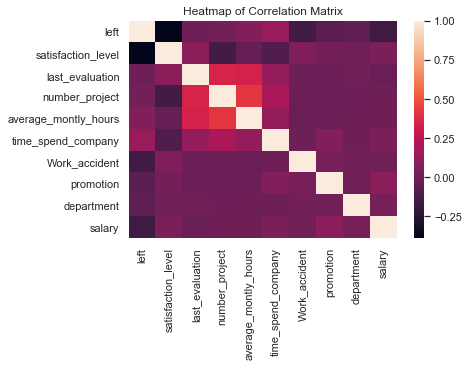

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values);
plt.title('Heatmap of Correlation Matrix')


In [70]:
corr

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion,department,salary
left,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,-0.043814,-0.157898
satisfaction_level,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,0.015413,0.050022
last_evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.011855,-0.013002
number_project,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.005577,-0.001803
average_montly_hours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,-0.002387,-0.002242
time_spend_company,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,-0.001611,0.048715
Work_accident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,0.019215,0.009247
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,0.015170,0.098119
department,-0.043814,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,0.015170,1.000000,0.033415
salary,-0.157898,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,0.098119,0.033415,1.000000


In [71]:
xticklabels=corr.columns.values
xticklabels

array(['left', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion', 'department', 'salary'], dtype=object)

In [72]:
depart_left_table=pd.crosstab(index=df['department'],columns=df['left'])
depart_left_table

left,0,1
department,,
0,3126,1014
1,563,204
2,524,215
3,2023,697
4,1674,555
5,539,91
6,954,273
7,704,198
8,655,203


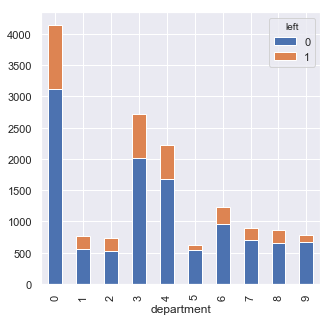

In [73]:
depart_left_table.plot(kind='bar',figsize=(5,5),stacked=True)

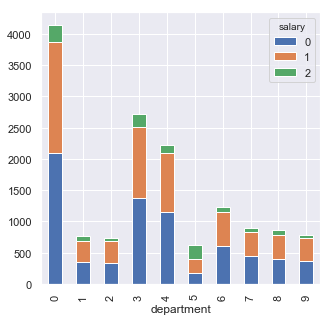

In [74]:
##department  vs  salary
depart_salary_table=pd.crosstab(index=df['department'],columns=df['salary'])
depart_salary_table.plot(kind="bar",figsize=(5,5),stacked=True)

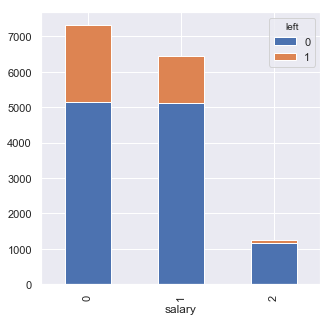

In [75]:
##salary  vs left
salary_left_table=pd.crosstab(index=df['salary'],columns=df['left'])
salary_left_table.plot(kind='bar',figsize=(5,5),stacked=True)

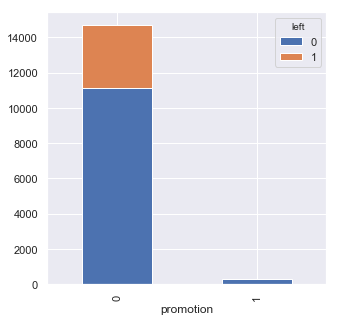

In [76]:
##promotion  vs  left
promotion_left_table=pd.crosstab(index=df['promotion'],columns=df['left'])
promotion_left_table.plot(kind='bar',figsize=(5,5),stacked=True)

D:\program files\ANACONDA\envs\py3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


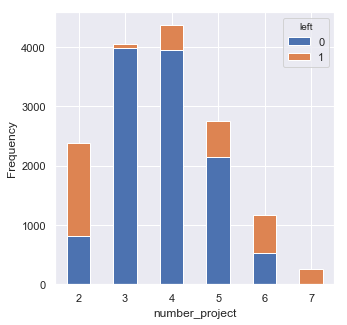

In [77]:
##number_project  vs  left
project_left_table=pd.crosstab(index=df['number_project'],columns=df['left'])
project_left_table.plot(kind='bar',figsize=(5,5),stacked=True)
df.loc[(df['left']==1),'number_project'].plot(kind='hist',normed=1,bins=15,stacked=False,alpha=1)

D:\program files\ANACONDA\envs\py3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


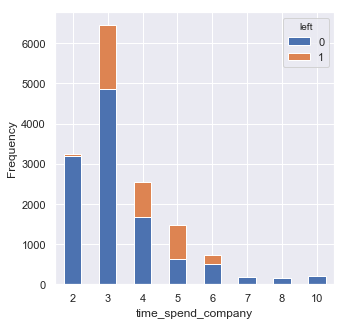

In [78]:
##time_spend_company  vs  left
company_left_table=pd.crosstab(index=df['time_spend_company'],columns=df['left'])
company_left_table.plot(kind='bar',figsize=(5,5),stacked=True)
df.loc[(df['left']==1),'time_spend_company'].plot(kind='hist',normed=1,bins=10,stacked=False,alpha=1)

D:\program files\ANACONDA\envs\py3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


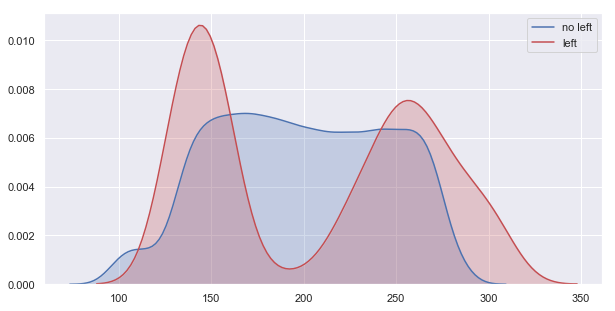

In [79]:
##average_montly_hours  vs  left
hours_left_table=pd.crosstab(index=df['average_montly_hours'],columns=df['left'])
fig=plt.figure(figsize=(10,5))
letf=sns.kdeplot(df.loc[(df['left']==0),'average_montly_hours'],color='b',shade=True,label='no left')
left=sns.kdeplot(df.loc[(df['left']==1),'average_montly_hours'],color='r',shade=True,label='left')

D:\program files\ANACONDA\envs\py3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


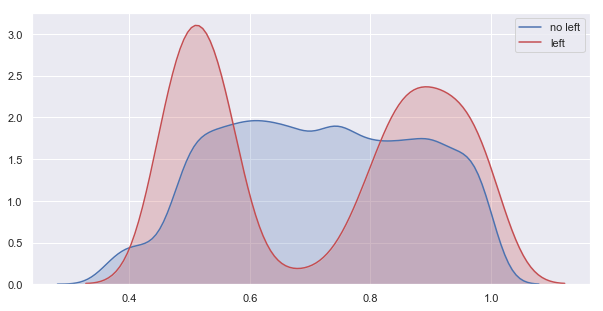

In [80]:
##last_evaluation  vs  left
evaluation_left_table=pd.crosstab(index=df['last_evaluation'],columns=df['left'])
fig=plt.figure(figsize=(10,5))
left=sns.kdeplot(df.loc[(df['left']==0),'last_evaluation'],color='b',shade=True,label='no left')
left=sns.kdeplot(df.loc[(df['left']==1),'last_evaluation'],color='r',shade=True,label='left')

D:\program files\ANACONDA\envs\py3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


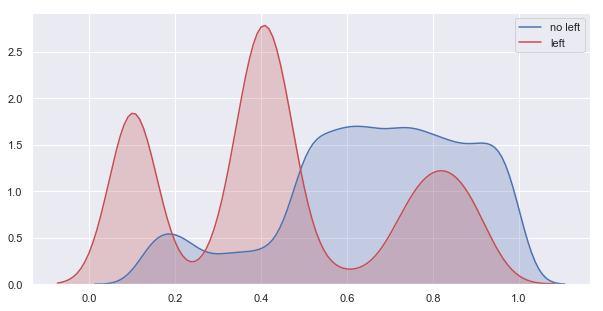

In [81]:
##satisfaction_level  vs  left  
satis_left_table=pd.crosstab(index=df['satisfaction_level'],columns=df['left'])
fig=plt.figure(figsize=(10,5))
left=sns.kdeplot(df.loc[(df['left']==0),'satisfaction_level'],color='b',shade=True,label='no left')
left=sns.kdeplot(df.loc[(df['left']==1),'satisfaction_level'],color='r',shade=True,label='left')

D:\program files\ANACONDA\envs\py3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
D:\program files\ANACONDA\envs\py3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


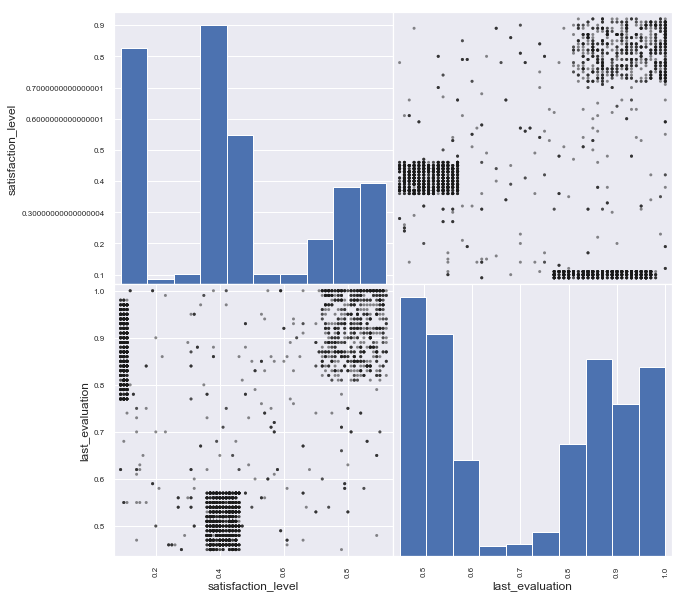

In [82]:
##last_evaluation  vs  satisfaction_level
df1=df[df['left']==1]
fig, ax = plt.subplots(figsize=(10,10))
pd.scatter_matrix(df1[['satisfaction_level','last_evaluation']],color='k',ax=ax)
plt.savefig('scatter.png',dpi=1000,bbox_inches='tight')

last_evaluation vs satisfaction_level
在绩效评估与满意度的散射矩阵中，可以看到有三个不同的集群。

集群1：满意度低于0.2，绩效评估大于0.75，这可以很好地表明离开公司的员工都是好员工，但对自己的工作感到不满意，当你受到高度评价的时候，这个集群应该代表着“过度劳累”的员工。

集群2：满意度在0.35～0.45之间，绩效评估在0.58以下，这可以被看作是雇员受到了不太好的评价，这可能意味着这些员工表现不好，所以员工自己的满意度也不好，这个集群代表着表现不佳的员工。

集群3：满意度在0.7～1之间，评价大于0.8，这可能意味着这个集群的员工是最理想的，他们热爱他们的工作，公司对他们的表现评价很高，这个类别的员工离开可能是因为他们找到了另一个工作机会。

4、总结

员工离职概述：

离职员工工作时间大部分是~6hours /天（工作）和~10小时/天（劳累）；

大部分离职员工薪资都在low~medium这一档，薪资水平低；

离职员工，几乎都没有得到升职；

大多数离职员工的评价分数在0.6以下和0.8以上；

离职员工大多数有2个项目，但同样有4-7个项目的员工离开，3个项目的员工离职率最低；

完成项目数，每月平均工作时间，绩效评估有正相关关系。意味着你工作越多，得到的评价就越高；

离职率、满意度与薪酬呈负相关关系。这意味着较低的满意度和工资产生了较高的离职率；

公司需要考虑的问题：

1、失去优秀员工会让公司产生多大损失？招新人和优秀老员工之间的成本与变现孰轻孰重？

2、什么原因产生了较低的满意度？

3、为什么离开的员工平均比没有离开的员工得到更高的评价，甚至是项目数量的增加？低评价的员工不应该更倾向于离开公司吗？

优秀员工看中的是良好的待遇，和更好的职业发展，这些因素都直接影响员工的主观感受，公司给予了员工高的评价，但没有相应转化到薪资和升职的变量中，即使一部分离职的优秀员工给予了公司不错的满意度，但依然不能阻挡他们会追寻更好的工作机会。